In [51]:
from google.colab import files
uploaded = files.upload()

Saving trn.csv to trn.csv


In [52]:
import numpy as np
import pandas as pd

In [53]:
traindata=pd.read_csv('trn.csv')

In [54]:
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
traindata.shape

(891, 12)

In [56]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
traindata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
traindata.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

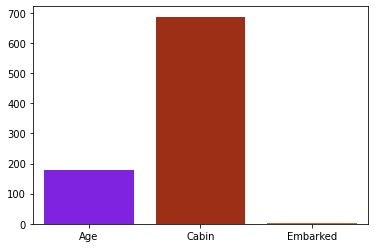

Age         177
Cabin       687
Embarked      2
dtype: int64


In [68]:
missingvalues = traindata.columns[traindata.isna().any()].tolist()
missingvaluesnumbers = traindata[missingvalues].isna().sum()

sns.barplot(y=missingvaluesnumbers, x=missingvalues, palette='gnuplot')
plt.show()
print( (missingvaluesnumbers))

In [136]:
traindata['Sex']=traindata['Sex'].map({"male":'1',"female":"0"})
traindata.head()
#male value equals 1
#female value equals 0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [85]:
traindata["Sex"] =traindata["Sex"].astype("category")
df_Sex = pd.get_dummies(traindata['Sex'])
df_new = pd.concat([traindata, df_Sex], axis=1)
print(df_new)
#anotherway to categorize the gender

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

In [83]:
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
traindata['Survived'].corr(traindata['Age'])

-0.07722109457217768

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabf5b70f10>]],
      dtype=object)

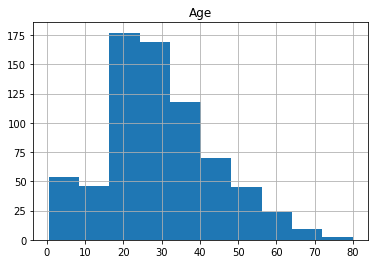

In [70]:
traindata.hist(column="Age")
#before handling nulls

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fabf5ac1cd0>]],
      dtype=object)

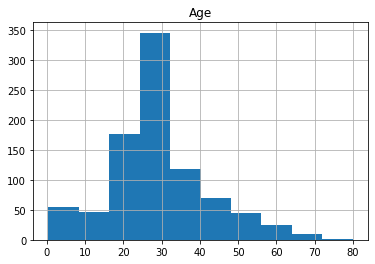

In [72]:
traindata["Age"].fillna(traindata["Age"].mean(),inplace=True)
traindata.hist(column="Age")
#after handling nulls

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


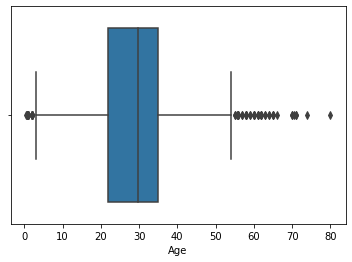

In [93]:
sns.boxplot(traindata["Age"])
#trying to find the maximum agegroup

In [138]:
traindata.drop(columns=["Cabin"],inplace=True) #dropping column of cabins as it have almost 600+ nuls

In [139]:
traindata.head() #cabin column dropped

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [98]:
#Where there any kids on the ship? After handling nulls
Kids = traindata[traindata['Age'] <= 15]
Kids.shape

(83, 12)

In [100]:
Kids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 7 to 875
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  83 non-null     int64   
 1   Survived     83 non-null     int64   
 2   Pclass       83 non-null     int64   
 3   Name         83 non-null     object  
 4   Sex          83 non-null     category
 5   Age          83 non-null     float64 
 6   SibSp        83 non-null     int64   
 7   Parch        83 non-null     int64   
 8   Ticket       83 non-null     object  
 9   Fare         83 non-null     float64 
 10  Cabin        13 non-null     object  
 11  Embarked     83 non-null     object  
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 8.0+ KB


     PassengerId  Survived  Pclass  \
9             10         1       2   
10            11         1       3   
22            23         1       3   
39            40         1       3   
43            44         1       2   
58            59         1       2   
78            79         1       2   
125          126         1       3   
165          166         1       3   
172          173         1       3   
183          184         1       2   
184          185         1       3   
193          194         1       2   
233          234         1       3   
237          238         1       2   
261          262         1       3   
305          306         1       1   
340          341         1       2   
348          349         1       3   
381          382         1       3   
407          408         1       2   
435          436         1       1   
445          446         1       1   
446          447         1       2   
448          449         1       3   
469         

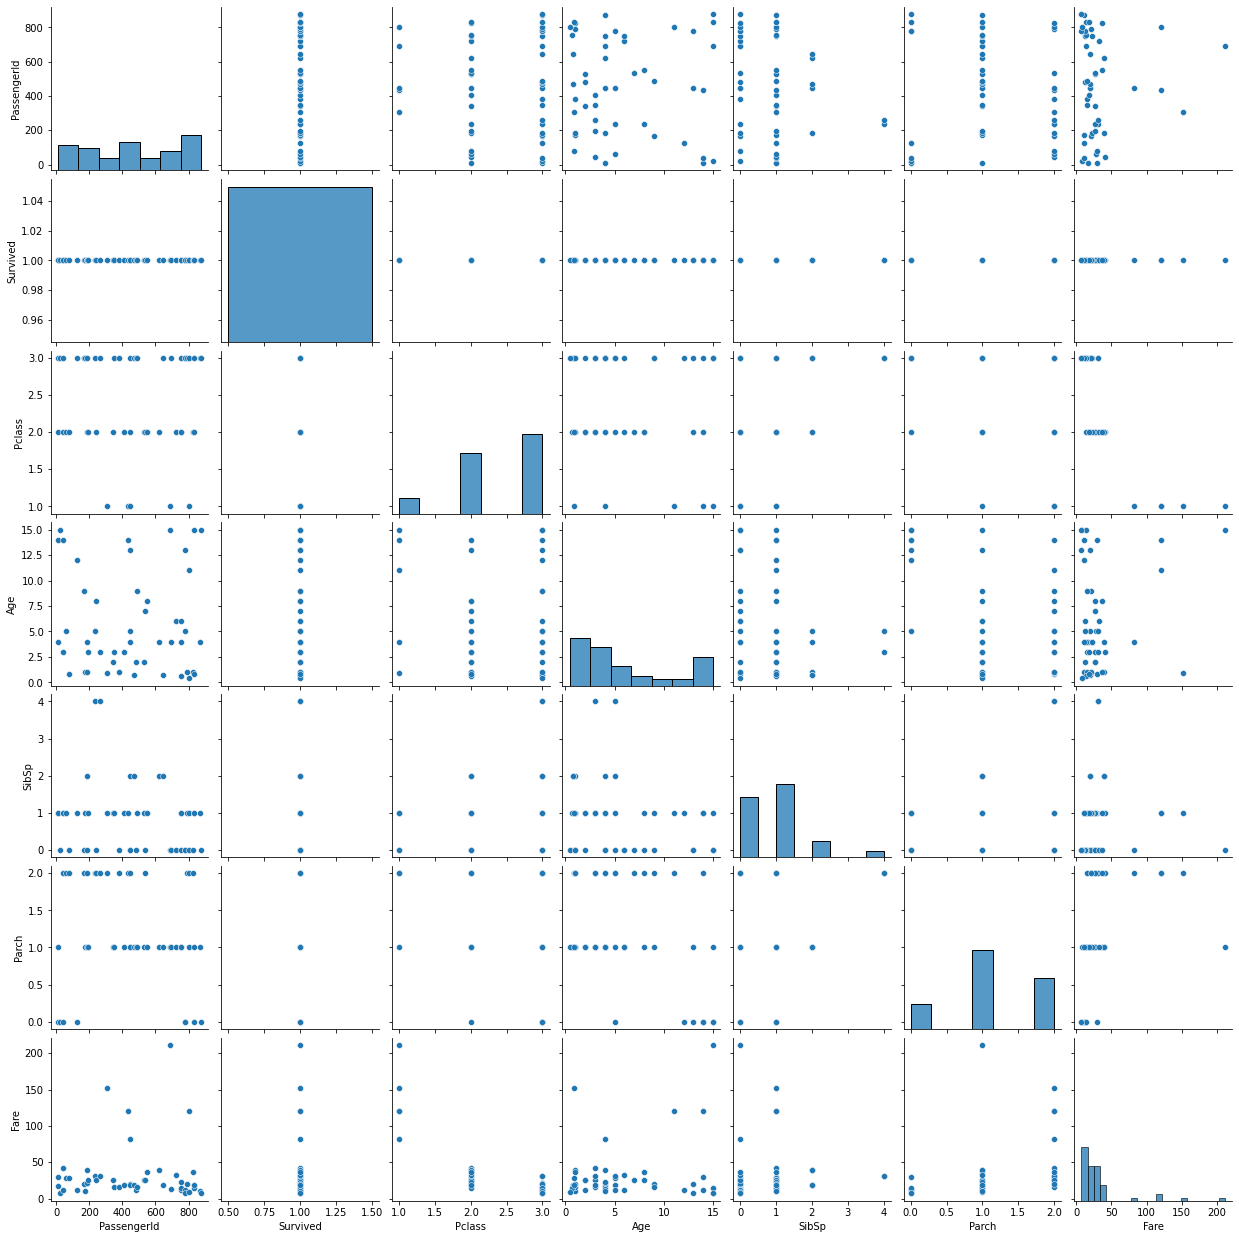

In [109]:
#CAN WE DETERMINE WHO SURVIVED FROM THE KIDS AND WHO DID NOT SURVIVE?
SURVIVEDKIDS = traindata[(traindata['Age'] <= 15) & (traindata['Survived'] == 1)]
print(SURVIVEDKIDS)
sns.pairplot(SURVIVEDKIDS)


     PassengerId  Survived  Pclass                                     Name  \
7              8         0       3           Palsson, Master. Gosta Leonard   
14            15         0       3     Vestrom, Miss. Hulda Amanda Adolfina   
16            17         0       3                     Rice, Master. Eugene   
24            25         0       3            Palsson, Miss. Torborg Danira   
50            51         0       3               Panula, Master. Juha Niilo   
59            60         0       3       Goodwin, Master. William Frederick   
63            64         0       3                    Skoog, Master. Harald   
111          112         0       3                     Zabour, Miss. Hileni   
119          120         0       3        Andersson, Miss. Ellis Anna Maria   
147          148         0       3         Ford, Miss. Robina Maggie "Ruby"   
164          165         0       3             Panula, Master. Eino Viljami   
171          172         0       3                  

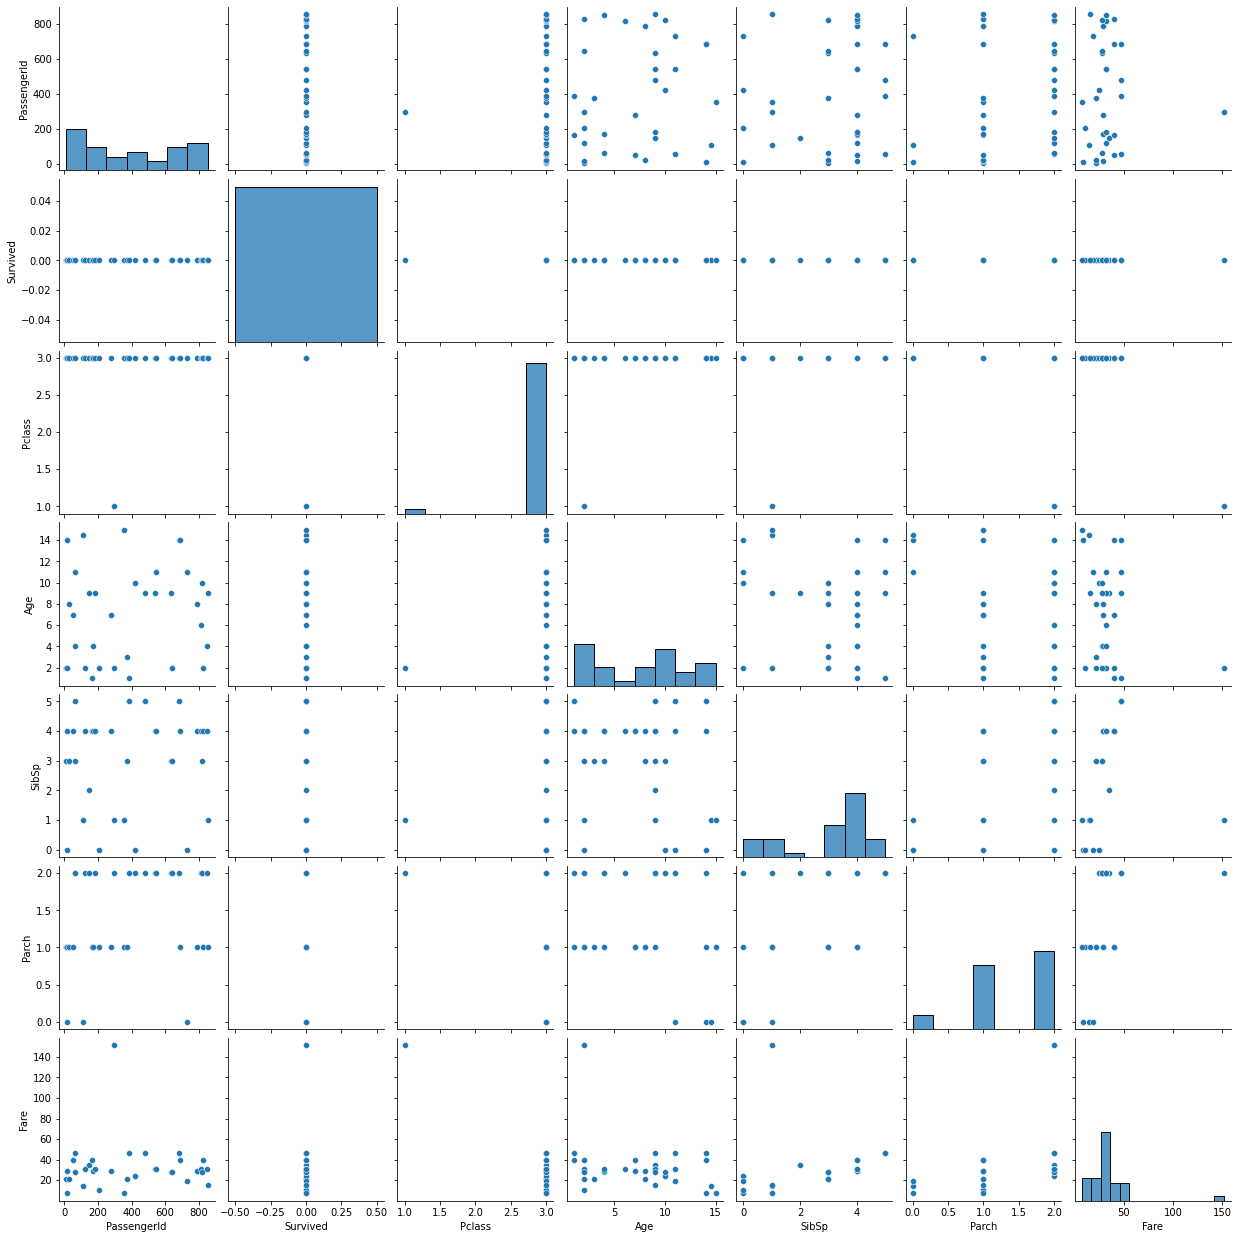

In [110]:
#CAN WE DETERMINE WHO SURVIVED FROM THE KIDS AND WHO DID NOT SURVIVE?
NO_SURVIVEDKIDS = traindata[(traindata['Age'] <= 15) & (traindata['Survived'] == 0)]
print(NO_SURVIVEDKIDS)
sns.pairplot(NO_SURVIVEDKIDS)

In [122]:
#SURVIVOR KIDS MALES AND FEMALES DETERMINATION
SURVIVEDMALEKID = traindata[(traindata['Sex'] == "male") & (traindata['Age'] <= 15) & (traindata['Survived'] == 1)]
print(SURVIVEDMALEKID)

     PassengerId  Survived  Pclass  \
78            79         1       2   
125          126         1       3   
165          166         1       3   
183          184         1       2   
193          194         1       2   
261          262         1       3   
305          306         1       1   
340          341         1       2   
348          349         1       3   
407          408         1       2   
445          446         1       1   
489          490         1       3   
549          550         1       2   
751          752         1       3   
755          756         1       2   
788          789         1       3   
802          803         1       1   
803          804         1       3   
827          828         1       2   
831          832         1       2   
869          870         1       3   

                                                Name   Sex    Age  SibSp  \
78                     Caldwell, Master. Alden Gates  male   0.83      0   
125        

In [123]:
#SURVIVOR KIDS feMALES AND FEMALES DETERMINATION
SURVIVEDfeMALEKID = traindata[(traindata['Sex'] == "female") & (traindata['Age'] <= 15) & (traindata['Survived'] == 1)]
print(SURVIVEDfeMALEKID)

     PassengerId  Survived  Pclass                                      Name  \
9             10         1       2       Nasser, Mrs. Nicholas (Adele Achem)   
10            11         1       3           Sandstrom, Miss. Marguerite Rut   
22            23         1       3               McGowan, Miss. Anna "Annie"   
39            40         1       3               Nicola-Yarred, Miss. Jamila   
43            44         1       2  Laroche, Miss. Simonne Marie Anne Andree   
58            59         1       2              West, Miss. Constance Mirium   
172          173         1       3              Johnson, Miss. Eleanor Ileen   
184          185         1       3       Kink-Heilmann, Miss. Luise Gretchen   
233          234         1       3            Asplund, Miss. Lillian Gertrud   
237          238         1       2          Collyer, Miss. Marjorie "Lottie"   
381          382         1       3               Nakid, Miss. Maria ("Mary")   
435          436         1       1      

In [124]:
#nonnonSURVIVOR KIDS feMALES AND FEMALES DETERMINATION
nonSURVIVEDfeMALEKID = traindata[(traindata['Sex'] == "female") & (traindata['Age'] <= 15) & (traindata['Survived'] == 0)]
print(nonSURVIVEDfeMALEKID)

     PassengerId  Survived  Pclass                                  Name  \
14            15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
24            25         0       3         Palsson, Miss. Torborg Danira   
111          112         0       3                  Zabour, Miss. Hileni   
119          120         0       3     Andersson, Miss. Ellis Anna Maria   
147          148         0       3      Ford, Miss. Robina Maggie "Ruby"   
205          206         0       3            Strom, Miss. Telma Matilda   
297          298         0       1          Allison, Miss. Helen Loraine   
374          375         0       3            Palsson, Miss. Stina Viola   
419          420         0       3             Van Impe, Miss. Catharina   
541          542         0       3  Andersson, Miss. Ingeborg Constanzia   
542          543         0       3     Andersson, Miss. Sigrid Elisabeth   
634          635         0       3                    Skoog, Miss. Mabel   
642         

In [125]:
#nonnonSURVIVOR KIDS MALES AND FEMALES DETERMINATION
nonSURVIVEDMALEKID = traindata[(traindata['Sex'] == "female") & (traindata['Age'] <= 15) & (traindata['Survived'] == 0)]
print(nonSURVIVEDMALEKID)

     PassengerId  Survived  Pclass                                  Name  \
14            15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
24            25         0       3         Palsson, Miss. Torborg Danira   
111          112         0       3                  Zabour, Miss. Hileni   
119          120         0       3     Andersson, Miss. Ellis Anna Maria   
147          148         0       3      Ford, Miss. Robina Maggie "Ruby"   
205          206         0       3            Strom, Miss. Telma Matilda   
297          298         0       1          Allison, Miss. Helen Loraine   
374          375         0       3            Palsson, Miss. Stina Viola   
419          420         0       3             Van Impe, Miss. Catharina   
541          542         0       3  Andersson, Miss. Ingeborg Constanzia   
542          543         0       3     Andersson, Miss. Sigrid Elisabeth   
634          635         0       3                    Skoog, Miss. Mabel   
642         

In [121]:
#CAN WE DETERMINE WHO SURVIVED FROM THE males AND WHO DID NOT SURVIVE?
SURVIVEDMALES= traindata[(traindata['Sex']== "male" ) & (traindata['Survived'] == 1)]
print(SURVIVEDMALES)

     PassengerId  Survived  Pclass                             Name   Sex  \
17            18         1       2     Williams, Mr. Charles Eugene  male   
21            22         1       2            Beesley, Mr. Lawrence  male   
23            24         1       1     Sloper, Mr. William Thompson  male   
36            37         1       3                 Mamee, Mr. Hanna  male   
55            56         1       1                Woolner, Mr. Hugh  male   
..           ...       ...     ...                              ...   ...   
838          839         1       3                  Chip, Mr. Chang  male   
839          840         1       1             Marechal, Mr. Pierre  male   
857          858         1       1           Daly, Mr. Peter Denis   male   
869          870         1       3  Johnson, Master. Harold Theodor  male   
889          890         1       1            Behr, Mr. Karl Howell  male   

           Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
17   29.6991

     PassengerId  Survived  Pclass                             Name   Sex  \
17            18         1       2     Williams, Mr. Charles Eugene  male   
21            22         1       2            Beesley, Mr. Lawrence  male   
23            24         1       1     Sloper, Mr. William Thompson  male   
36            37         1       3                 Mamee, Mr. Hanna  male   
55            56         1       1                Woolner, Mr. Hugh  male   
..           ...       ...     ...                              ...   ...   
838          839         1       3                  Chip, Mr. Chang  male   
839          840         1       1             Marechal, Mr. Pierre  male   
857          858         1       1           Daly, Mr. Peter Denis   male   
869          870         1       3  Johnson, Master. Harold Theodor  male   
889          890         1       1            Behr, Mr. Karl Howell  male   

           Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
17   29.6991

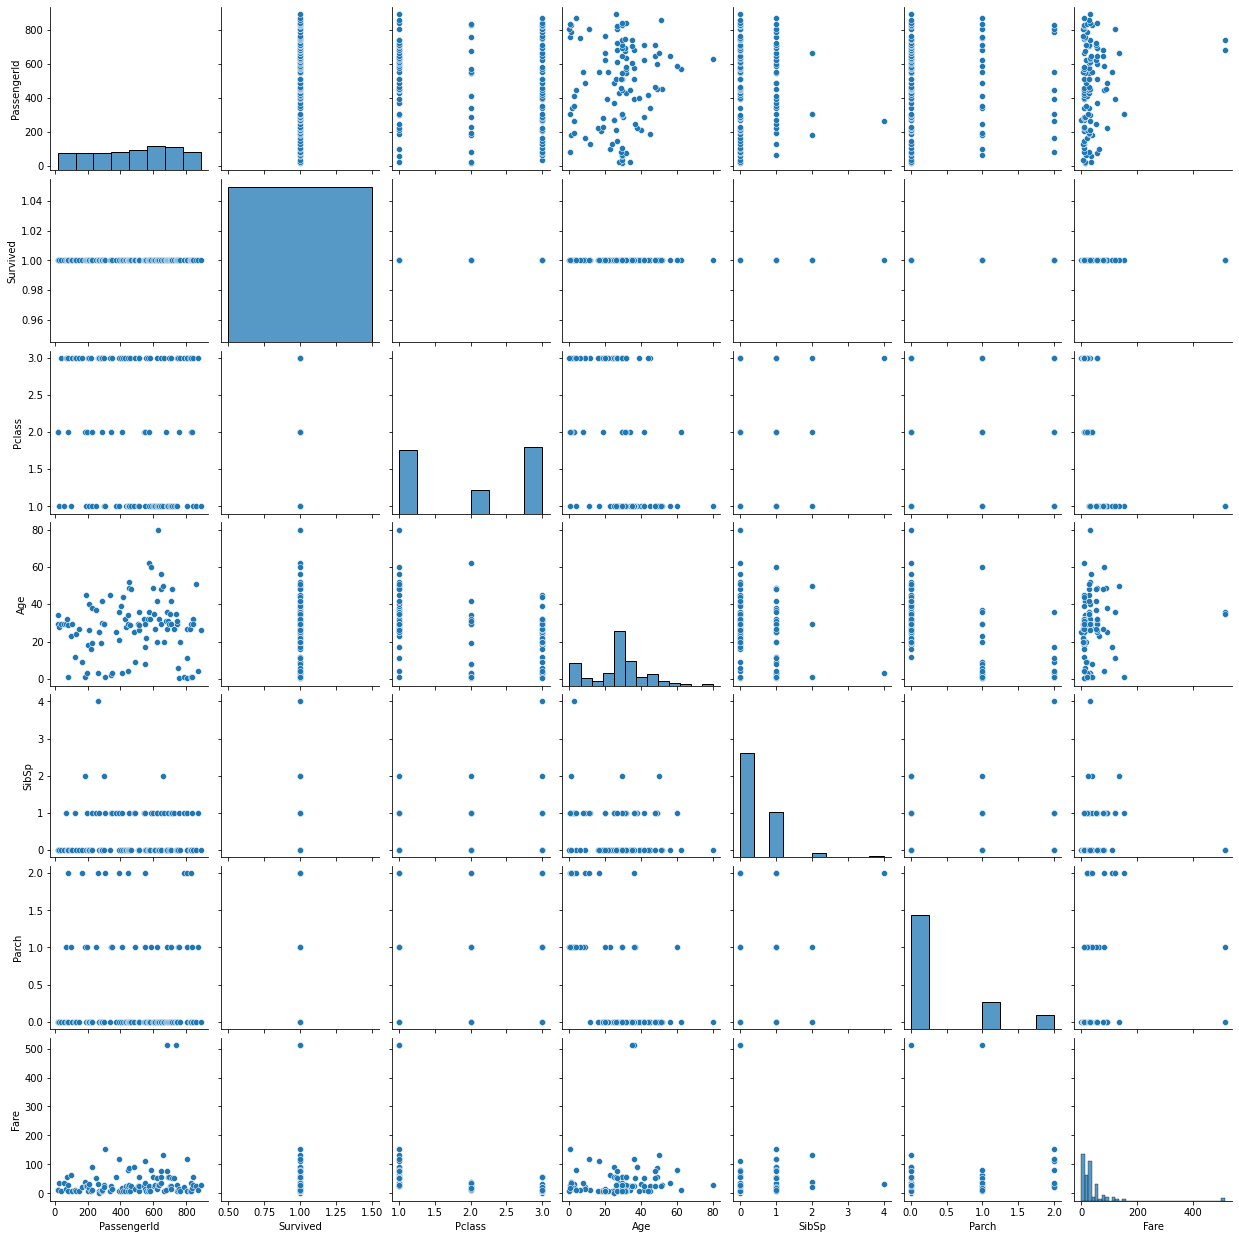

In [119]:
#CAN WE DETERMINE WHO SURVIVED FROM THE males AND WHO DID NOT SURVIVE?
SURVIVEDMALES= traindata[(traindata['Sex']== "male" ) & (traindata['Survived'] == 1)]
print(SURVIVEDMALES)
sns.pairplot(SURVIVEDMALES)

In [120]:
#CAN WE DETERMINE WHO  DIDN'T SURVIVE FROM THE males AND WHO DID NOT SURVIVE?
NO_SURVIVEDMALES= traindata[(traindata['Sex']== "male" ) & (traindata['Survived'] == 0)]
print(NO_SURVIVEDMALES)


     PassengerId  Survived  Pclass                            Name   Sex  \
0              1         0       3         Braund, Mr. Owen Harris  male   
4              5         0       3        Allen, Mr. William Henry  male   
5              6         0       3                Moran, Mr. James  male   
6              7         0       1         McCarthy, Mr. Timothy J  male   
7              8         0       3  Palsson, Master. Gosta Leonard  male   
..           ...       ...     ...                             ...   ...   
881          882         0       3              Markun, Mr. Johann  male   
883          884         0       2   Banfield, Mr. Frederick James  male   
884          885         0       3          Sutehall, Mr. Henry Jr  male   
886          887         0       2           Montvila, Rev. Juozas  male   
890          891         0       3             Dooley, Mr. Patrick  male   

           Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    22.000000

In [128]:
NO_SURVIVEDMALES.describe() #counting male kids in

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,468.000000,468.0,468.000000,468.000000,468.000000,468.000000,468.000000
mean,449.121795,0.0,2.476496,31.175224,0.440171,0.207265,21.960993
std,260.365260,0.0,0.761411,12.350532,1.138507,0.601382,32.409799
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,212.500000,0.0,2.000000,24.000000,0.000000,0.000000,7.795800
50%,461.000000,0.0,3.000000,29.699118,0.000000,0.000000,9.416650
75%,678.500000,0.0,3.000000,36.000000,0.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,5.000000,263.000000


In [127]:
drownmen = traindata[(traindata['Sex'] == "male") & (traindata['Age'] > 16) & (traindata['Survived'] == 0)]
drownmen.describe()
#without including dead male kids

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000
mean,450.457859,0.0,2.446469,32.562653,0.291572,0.150342,21.562611
std,257.409260,0.0,0.774143,11.376950,0.892228,0.536515,33.265697
min,1.000000,0.0,1.000000,17.000000,0.000000,0.000000,0.000000
25%,216.500000,0.0,2.000000,25.000000,0.000000,0.000000,7.775000
50%,463.000000,0.0,3.000000,29.699118,0.000000,0.000000,8.662500
75%,672.500000,0.0,3.000000,36.000000,0.000000,0.000000,24.150000
max,891.000000,0.0,3.000000,74.000000,8.000000,5.000000,263.000000


In [129]:
drownf = traindata[(traindata['Sex'] == "female") & (traindata['Age'] > 16) & (traindata['Survived'] == 0)]
drownf.describe()
#without including dead female kids

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,65.000000,65.0,65.000000,65.000000,65.000000,65.000000,65.000000
mean,452.338462,0.0,2.846154,30.482846,0.923077,0.923077,20.568208
std,258.420761,0.0,0.441261,8.925591,1.743808,1.492771,21.947119
min,19.000000,0.0,1.000000,17.000000,0.000000,0.000000,6.750000
25%,241.000000,0.0,3.000000,25.000000,0.000000,0.000000,8.137500
50%,437.000000,0.0,3.000000,29.699118,0.000000,0.000000,14.454200
75%,658.000000,0.0,3.000000,32.000000,1.000000,1.000000,25.466700
max,889.000000,0.0,3.000000,57.000000,8.000000,6.000000,151.550000


In [133]:

drwnfcount= traindata[(traindata['Sex']== "female" ) & (traindata['Survived'] == 0)]
print(drwnfcount)

drwnfcount.info()
drwnfcount.count()

#counting female kids in

     PassengerId  Survived  Pclass  \
14            15         0       3   
18            19         0       3   
24            25         0       3   
38            39         0       3   
40            41         0       3   
..           ...       ...     ...   
854          855         0       2   
863          864         0       3   
882          883         0       3   
885          886         0       3   
888          889         0       3   

                                                  Name     Sex        Age  \
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.000000   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.000000   
24                       Palsson, Miss. Torborg Danira  female   8.000000   
38                  Vander Planke, Miss. Augusta Maria  female  18.000000   
40      Ahlin, Mrs. Johan (Johanna Persdotter Larsson)  female  40.000000   
..                                                 ...     ...        ...   
854 

PassengerId    81
Survived       81
Pclass         81
Name           81
Sex            81
Age            81
SibSp          81
Parch          81
Ticket         81
Fare           81
Cabin           6
Embarked       81
dtype: int64

In [134]:
drwnfcount.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,81.000000,81.0,81.000000,81.000000,81.000000,81.000000,81.000000
mean,434.851852,0.0,2.851852,26.023272,1.209877,1.037037,23.024385
std,263.522063,0.0,0.450309,12.234723,1.814635,1.391442,24.821287
min,15.000000,0.0,1.000000,2.000000,0.000000,0.000000,6.750000
25%,206.000000,0.0,3.000000,18.000000,0.000000,0.000000,8.850000
50%,420.000000,0.0,3.000000,29.000000,1.000000,0.000000,15.245800
75%,643.000000,0.0,3.000000,30.000000,1.000000,2.000000,27.900000
max,889.000000,0.0,3.000000,57.000000,8.000000,6.000000,151.550000


3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


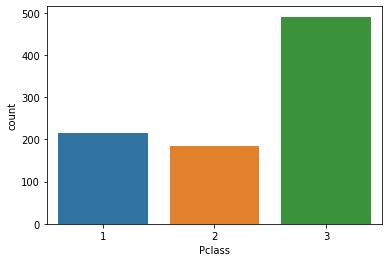

In [91]:
print(traindata["Pclass"].value_counts()/891*100)
sns.countplot(traindata["Pclass"])
            

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


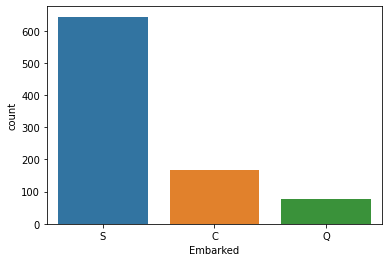

In [92]:
print(traindata["Embarked"].value_counts()/891*100)
sns.countplot(traindata["Embarked"])
#without handling nulls

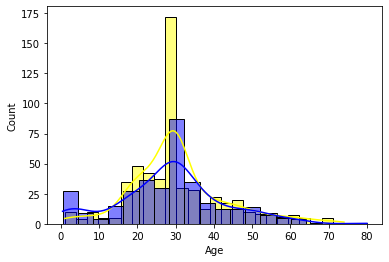

In [135]:
sns.histplot(traindata[traindata["Survived"]==0]["Age"],color="yellow",kde=True)
sns.histplot(traindata[traindata["Survived"]==1]["Age"],color="Blue",kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


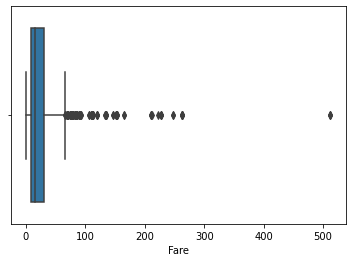

In [141]:
sns.boxplot(traindata["Fare"])


In [143]:
fareanalysis=  print(" Number of passengers  with the Fare in betbeen 100 to 300 are: " 
      + str(traindata[(traindata["Fare"]>=100) & (traindata["Fare"]<=300)].shape[0]))

 Number of passengers  with the Fare in betbeen 100 to 300 are: 50


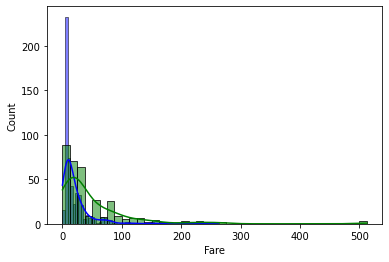

In [148]:
sns.histplot(traindata[traindata["Survived"]==0]["Fare"],color="blue",kde=True)
sns.histplot(traindata[traindata["Survived"]==1]["Fare"],color="green",kde=True)

In [149]:
traindata=traindata[traindata["Age"]<(traindata["Age"].mean() +3*traindata["Age"].std() )]
traindata.shape

(884, 11)

In [150]:
q1 = np.percentile(traindata["Fare"],25)
q3 = np.percentile(traindata["Fare"],75)

In [151]:
outlier_low = -1.5*(q3-q1)
outlier_high= 1.5*(q3-q1)

In [152]:
traindata=traindata[(traindata["Fare"] > outlier_low ) & (traindata["Fare"]<outlier_high)]
traindata.shape

(687, 11)